In [1]:
import os
import warnings
warnings.filterwarnings('ignore')
os.chdir('/Users/gosc/Desktop/Kaggle/Zomato - Bangalore') 

In [2]:
import matplotlib.pyplot

## Read data

In [4]:
### import libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
import pandas_profiling
### text processing
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import swifter
nltk.download('vader_lexicon')
#import geopy
#from geopy import geocoders
#from geopy.geocoders import GoogleV3

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/gosc/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [5]:
# Options for pandas
pd.options.display.max_columns = 30




In [6]:
#### read data
data=pd.read_csv('zomato.csv',encoding='latin-1')
data.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [10]:
print(len(data))

51717


In [11]:
#data= data.drop_duplicates(subset='name',keep='first')

In [12]:
for col in data.columns:
    dtype = str(data[col].dtype)
    print(col, dtype)

url object
address object
name object
online_order object
book_table object
rate object
votes int64
phone object
location object
rest_type object
dish_liked object
cuisines object
approx_cost(for two people) object
reviews_list object
menu_item object
listed_in(type) object
listed_in(city) object


#### Number of Nulls

In [13]:
print('Number of nulls:')
round((data.isnull() | data.isna()).sum()/len(data),3)

Number of nulls:


url                            0.000
address                        0.000
name                           0.000
online_order                   0.000
book_table                     0.000
rate                           0.150
votes                          0.000
phone                          0.023
location                       0.000
rest_type                      0.004
dish_liked                     0.543
cuisines                       0.001
approx_cost(for two people)    0.007
reviews_list                   0.000
menu_item                      0.000
listed_in(type)                0.000
listed_in(city)                0.000
dtype: float64

In [14]:
#data[(data.menu_item.notnull()) & ~(data.menu_item.isna())]

#### Number of Unique Values

In [15]:
print('Number of unique values in the data')
print(data.nunique())

Number of unique values in the data
url                            51717
address                        11495
name                            8792
online_order                       2
book_table                         2
rate                              64
votes                           2328
phone                          14926
location                          93
rest_type                         93
dish_liked                      5271
cuisines                        2723
approx_cost(for two people)       70
reviews_list                   22513
menu_item                       9098
listed_in(type)                    7
listed_in(city)                   30
dtype: int64


# Data understanding & Preprocessing

In [16]:
DataFull=data.copy() 

In [17]:
data= data.drop_duplicates(subset=['name','address'],keep='first') #assumption of distinct identifier

In [18]:
data = data.reset_index()

#### Dropping some columns

In [19]:
data.drop(['url','phone'],inplace=True,axis=1)

In [20]:
data.columns.values

array(['index', 'address', 'name', 'online_order', 'book_table', 'rate',
       'votes', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'], dtype=object)

#### Renaming columns

In [21]:
data.rename(columns=
        {'name':'rest_name','approx_cost(for two people)': 'meal_cost', 'listed_in(city)':
         'Neighbourhood','listed_in(type)': 'restaurant_type','rest_type':'restaurant_category'}, inplace=True)

### Preprocessing 

In [22]:
data.rate = data.rate.astype(str).apply(lambda x: x.replace('/5',''))
data.rate = data.rate.astype(str).apply(lambda x: x.replace(',/n',''))
data.loc[(data.rate =='NEW') | (data.rate =='-'), 'rate'] = np.nan
data.rate = data.rate.apply(lambda x: float(x))

In [23]:
data['meal_cost'] = data['meal_cost'].str.replace(',', '').astype(float)

data['votes'] = data['votes'].astype(float)

data['rest_name'] = data['rest_name'].str.strip()

data['rest_name'] = data['rest_name'].replace(['[^A-Za-z0-9_.,!"\s]+'], [''], regex=True)

### TEXT PROCESSING

In [24]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
#import swifter
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/gosc/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

#### DISH LIKED

Spliting text columns

In [25]:
words_list=[]
for dish in data['dish_liked']:
    dish = str(dish)
    tokens = dish.split()
    for t in tokens:
        t = t.replace(',', '')
        if t != 'nan':
            words_list.append(t)

In [26]:
DishedDF=pd.DataFrame(words_list)
DishedDF[0].value_counts().head(5)

Chicken      2812
Biryani      1602
Pizza         756
Masala        649
Chocolate     617
Name: 0, dtype: int64

In [27]:
type(words_list)

list

In [28]:
def WordCount(WordsList, limit=30):
    plt.figure(figsize=(10,4))
    sns.countplot(pd.DataFrame(WordsList)[0], 
    palette='Set3',order = pd.DataFrame(WordsList)[0].value_counts().head(limit).index)
    plt.xticks(rotation=90)

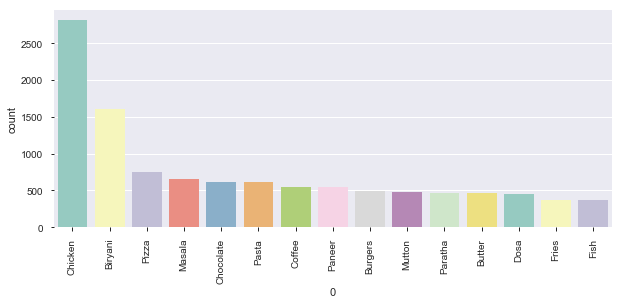

In [29]:
WordCount(words_list, 15)

In [30]:
def wordCloud(data, backgroundcolor="white", wordmax=80, sizefont=20, color='steelblue'):
    wc = WordCloud(background_color=backgroundcolor, 
                   max_words=wordmax, max_font_size=sizefont, scale=10, contour_color=color)
    wc.generate(' '.join(data))
    plt.figure()
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.show()

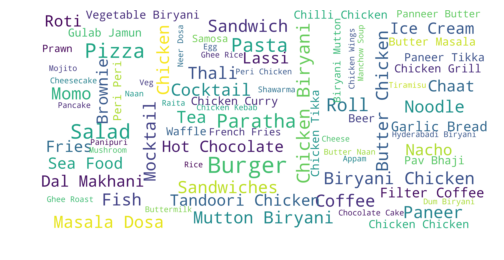

In [31]:
wordCloud(words_list)

In [32]:
d=data['menu_item']

In [33]:
menu=[]
for dish in d:
    dish = str(dish)
    dish = dish.replace('\\', '')
    dish = dish.replace('[', '')
    dish = dish.replace(']', '')
    tokens = dish.split("', '")
    for t in tokens:
        t = t.replace(',', '')
        if len(t)>0:
            menu.append(t)

In [34]:
menudf=pd.DataFrame(menu)
menudf[0].value_counts().head(5)

Chicken Fried Rice      752
Veg Fried Rice          739
Paneer Butter Masala    648
Jeera Rice              635
Egg Fried Rice          613
Name: 0, dtype: int64

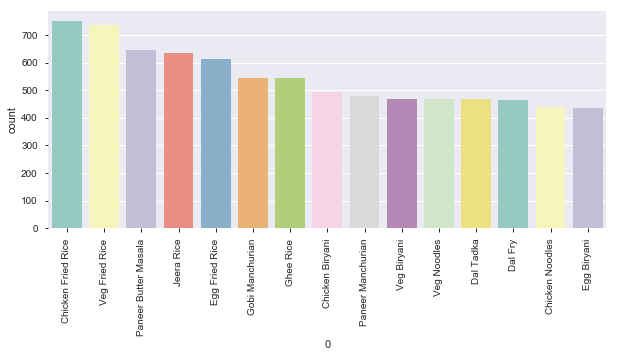

In [35]:
WordCount(menudf, 15)

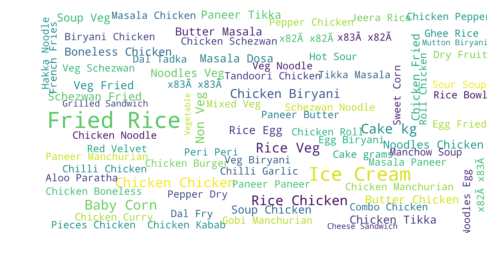

In [36]:
wordCloud(menu)

### Reviews

In [37]:
data.reviews_list.head(5)

0    [('Rated 4.0', 'RATED\n  A beautiful place to ...
1    [('Rated 4.0', 'RATED\n  Had been here for din...
2    [('Rated 3.0', "RATED\n  Ambience is not that ...
3    [('Rated 4.0', "RATED\n  Great food and proper...
4    [('Rated 4.0', 'RATED\n  Very good restaurant ...
Name: reviews_list, dtype: object

In [38]:
reviews=data.reviews_list.copy()

In [39]:
%%time
review_list= []
review_list_non_english = []
single_rate= [] #### TO DO !
for i in range(len(reviews)):#first 100
    single_review = reviews[i]
    # I could not sort it one in a one
    single_review = re.sub(r'\\n|\\x|\.', ' ', single_review.lower())
    single_review  = re.sub("[)]+", "split", single_review) # first this since it nee dto be splitted by 
    single_review  = re.sub("[^a-z]+", " ", single_review) # all not being a-z letters to remove
    ### version 1
    single_review = [x for x in single_review.split() if x not in 'rated']
    single_review = ' '.join(single_review)
    single_review1 = single_review.split('split')
    
    review_list.append(single_review1)
    
    ### version 2 
    #single_review2 = [x for x in single_review.split() if (x not in set(stopwords.words('english')) and (x!='rated'))]
   # single_review2 = ' '.join(single_review2)
    #single_review2 = single_review2.split('split')
    
    #review_list_non_english.append(single_review2)
  

CPU times: user 14.1 s, sys: 469 ms, total: 14.5 s
Wall time: 15.6 s


In [40]:
review_list[1000][0]

'as usual bombay kulfi tastes great i had ordered kulfis from here packing wise they should have done better they pack three kulfis in one aluminium cover taste wise it s always good '

In [41]:
analyser = SentimentIntensityAnalyzer()

In [42]:
%%time
review_output = []
for i, restaurant in enumerate(review_list):
    for j, review in enumerate(restaurant):
        dictSent=analyser.polarity_scores(review)
        review_output.append([i,j,review,dictSent['compound']])

CPU times: user 3min 27s, sys: 3.16 s, total: 3min 30s
Wall time: 3min 50s


#### each review and iits sentiment

In [43]:
SentimentAnalysis = pd.DataFrame(review_output, columns = ['Restaurant' , 'ReviewNumber', 'Review','Sentiment']) 

In [44]:
SentimentAnalysis[(SentimentAnalysis['Restaurant']==12495)  & (SentimentAnalysis['ReviewNumber']==6)]

,Restaurant,ReviewNumber,Review,Sentiment
277689,12495,6,the ambience is quite nice full of star vibes...,0.4945


#### avg sentiment per restaurant

In [45]:
group = SentimentAnalysis['Sentiment'].groupby(SentimentAnalysis['Restaurant']).mean()

In [46]:
data['ReviewSentiment'] = group

### Lets check how Sentiment correlates with the review

In [47]:
(data.rate.isnull() | data.rate.isna()).sum()

3183

In [48]:
data.rate = data.rate.fillna(0)
data['ReviewSentiment'].corr(data['rate'])
#moreless

0.557760268996255

In [49]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()
scaled_rate = scaler.fit_transform(np.array(data['rate']).reshape(-1, 1))
data['RateScaleded']=scaled_rate

#### Plotting

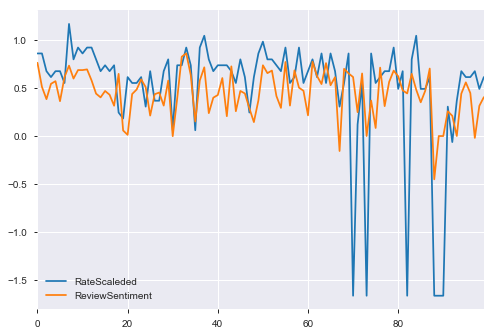

In [50]:
data[:100][['RateScaleded','ReviewSentiment']].plot()

In [51]:
data.columns.values

array(['index', 'address', 'rest_name', 'online_order', 'book_table',
       'rate', 'votes', 'location', 'restaurant_category', 'dish_liked',
       'cuisines', 'meal_cost', 'reviews_list', 'menu_item',
       'restaurant_type', 'Neighbourhood', 'ReviewSentiment',
       'RateScaleded'], dtype=object)

#### Scaled

In [52]:
group = data[['RateScaleded','ReviewSentiment']].groupby(data['restaurant_type']).mean()

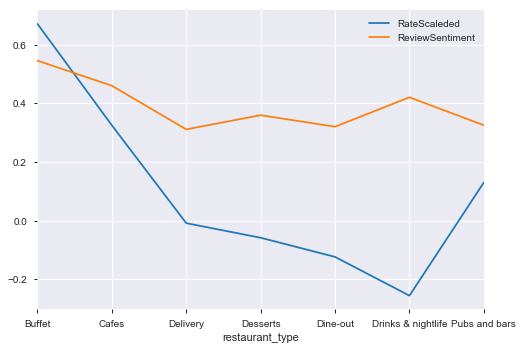

In [53]:
group[['RateScaleded','ReviewSentiment']].plot()

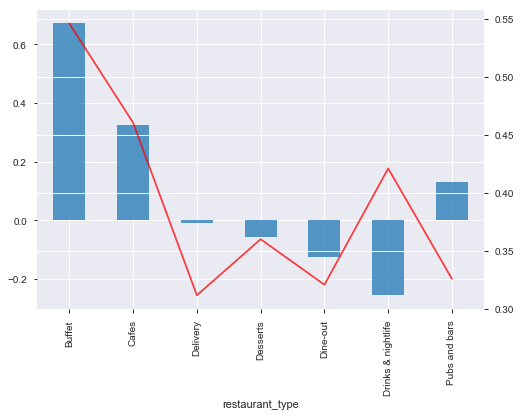

In [54]:
ax = group.RateScaleded.plot(alpha = .75, kind = 'bar')
ax2 = ax.twinx()
ax2.plot(ax.get_xticks(), group.ReviewSentiment.values, alpha = .75, color = 'r')

### Not scaled

In [58]:
group2 = data[['rate','ReviewSentiment']].groupby(data['restaurant_type']).mean()

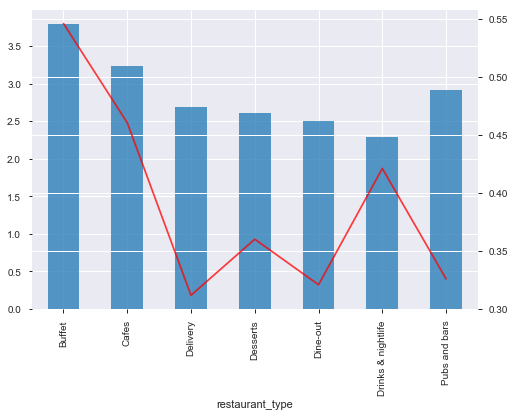

In [59]:
ax = group2.rate.plot(alpha = .75, kind = 'bar')
ax2 = ax.twinx()
ax2.plot(ax.get_xticks(), group2.ReviewSentiment.values, alpha = .75, color = 'r')

**Observation:** 
* So we can see that is better to observe correlation between Sentiment and scaled rate. 

* Apart for night live and pubs rate an dsentiment goesin pair

# YOUR CODE BELOW BUT I DELETED STH :)

In [66]:
import dask.dataframe as ddf
import time

In [61]:
%%time
temp1 =data['reviews_list']

CPU times: user 181 µs, sys: 1 µs, total: 182 µs
Wall time: 189 µs


In [63]:
dask_dataframe = ddf.from_pandas(temp1, npartitions=16)

In [64]:
temp_100= temp1.head(100)

In [71]:
%%time
review_output = []
for i, restaurant in enumerate(dask_dataframe):
    for j, review in enumerate(restaurant):
        dictSent=analyser.polarity_scores(review)
        review_output.append([i,j,review,dictSent['compound']])

NotImplementedError: Series getitem in only supported for other series objects with matching partition structure

In [67]:
t0 = time.time()
result = dask_dataframe.map_partitions(temp, meta=temp_100)
temp1 = result.compute()
t1 = time.time()
print("Time to process with Dask {}".format(t1-t0))

NameError: name 'temp' is not defined

In [628]:
start= time.time()
df = data['reviews_list'].head(1000).swifter.apply(lambda x : pd.DataFrame(analyser.polarity_scores(x),index=[0])['neg']*100)
end= time.time()
print(end-start)

498.150151014328


In [142]:
data['reviews_list'].head(100).apply(lambda x: analyser.polarity_scores(x))

0     {'neg': 0.032, 'neu': 0.691, 'pos': 0.276, 'co...
1     {'neg': 0.053, 'neu': 0.736, 'pos': 0.211, 'co...
2     {'neg': 0.077, 'neu': 0.786, 'pos': 0.137, 'co...
3     {'neg': 0.039, 'neu': 0.793, 'pos': 0.168, 'co...
4     {'neg': 0.0, 'neu': 0.773, 'pos': 0.227, 'comp...
5     {'neg': 0.0, 'neu': 0.965, 'pos': 0.035, 'comp...
6     {'neg': 0.026, 'neu': 0.671, 'pos': 0.303, 'co...
7     {'neg': 0.036, 'neu': 0.683, 'pos': 0.282, 'co...
8     {'neg': 0.062, 'neu': 0.664, 'pos': 0.275, 'co...
9     {'neg': 0.036, 'neu': 0.764, 'pos': 0.201, 'co...
10    {'neg': 0.034, 'neu': 0.678, 'pos': 0.288, 'co...
11    {'neg': 0.024, 'neu': 0.728, 'pos': 0.248, 'co...
12    {'neg': 0.015, 'neu': 0.774, 'pos': 0.211, 'co...
13    {'neg': 0.069, 'neu': 0.731, 'pos': 0.2, 'comp...
14    {'neg': 0.074, 'neu': 0.773, 'pos': 0.153, 'co...
15    {'neg': 0.072, 'neu': 0.718, 'pos': 0.21, 'com...
16    {'neg': 0.067, 'neu': 0.756, 'pos': 0.177, 'co...
17    {'neg': 0.095, 'neu': 0.667, 'pos': 0.238,

In [139]:
start= time.time()
df1 = temp1.head(100).apply(lambda x : pd.DataFrame(analyser.polarity_scores(x),index=[0])['neu']*100)
end= time.time()
print(end-start)

71.24759149551392


In [140]:
start= time.time()
df2 = data['reviews_list'].head(100).swifter.apply(lambda x : pd.DataFrame(analyser.polarity_scores(x),index=[0])['pos']*100)
end= time.time()
print(end-start)


74.62653231620789


In [ ]:
start= time.time()
df3 = data['reviews_list'].swifter.apply(lambda x : pd.DataFrame(analyser.polarity_scores(x),index=[0])['compound']*100)
end= time.time()
print(end-start)

In [489]:
temp_new= temp_new[temp_new['reviews_list'].notnull()].compute()

In [123]:
patt = lambda x : pd.DataFrame(analyser.polarity_scores(x),index=[0])['neg']*100

In [ ]:
start= time.time()
df=temp_new['reviews_list'].head(100).apply(patt)
end= time.time()
print(end-start)

In [414]:

data['negtivity']=data['reviews_list'].apply(lambda x : pd.DataFrame(analyser.polarity_scores(x),index=[0])['neg']*100)
end= time.time()
print(end-start)

29.995056629180908


In [363]:
df= data_temp['reviews_list'].head(100).swifter.apply(lambda x : pd.DataFrame(analyser.polarity_scores(x),index=[0]))

In [374]:
pd.concat([data.head(100),df],axis=1)['reviews_list'].iloc[0]

reviews_list       A beautiful place to dine inThe interiors t...
reviews_list         neg    neu    pos  compound
0  0.032  0.6...
Name: 0, dtype: object

In [ ]:
data_temp['Negetive']=data_temp['reviews_list'].swifter.apply(lambda x : pd.DataFrame(analyser.polarity_scores(x),index=[0])['neg']*100)

In [ ]:
data_temp['Positive']=data_temp['reviews_list'].apply(lambda x : pd.DataFrame(analyser.polarity_scores(data['reviews_list'][0]),index=[0]))['pos']*100

In [ ]:
data_temp['Nuetral']=data_temp['reviews_list'].apply(lambda x : pd.DataFrame(analyser.polarity_scores(data['reviews_list'][0]),index=[0]))['nue']*100

In [ ]:
data_temp['Compound']=data_temp['reviews_list'].apply(lambda x : pd.DataFrame(analyser.polarity_scores(data['reviews_list'][0]),index=[0]))['compound']*100

In [415]:
data_temp['reviews_list'].head(10).apply(lambda x : pd.DataFrame(analyser.polarity_scores(x),index=[0])['neg']*100)

,0
0,3.2
1,5.3
2,7.7
3,3.9
4,0.0
5,0.0
6,2.6
7,3.6
8,6.2
9,3.6


In [416]:
data_temp_10 = data_temp.head(10)

In [ ]:
data_temp_10['Negetive']=data_temp['reviews_list'].head(10).apply(lambda x :pd.DataFrame(analyser.polarity_scores(x),index=[0])['neg']*100)
data_temp_10['Negetive']

In [404]:
temp =pd.concat([data.iloc[0],pd.DataFrame(analyser.polarity_scores(data['reviews_list'].iloc[0]),index=[0])],axis=1)

In [ ]:
data_temp_10['Negetive']=data_temp['reviews_list'].head(10).apply(lambda x :pd.DataFrame(analyser.polarity_scores(x),index=[0])['neg']*100)
data_temp_10['Negetive']

In [ ]:
from numba import njit

@njit(parallel=True)

def numba1(data):
    one=[]
    for i in range(data.index):
        one.append(data['reviews_list'].iloc[i]).apply(lambda x :analyser.polarity_scores(x))
    return(one)
numba1(data)

In [263]:

import time
start = time.time()
data_temp['reviews_list'].head(10).apply(lambda x :analyser.polarity_scores(x))
end = time.time()
print(end-start)

3.1685423851013184


In [432]:
temp_new['reviews_list'].apply()

,address,rest_name,online_order,book_table,rate,votes,location,restaurant_category,dish_liked,cuisines,meal_cost,reviews_list,menu_item,restaurant_type,Neighbourhood,num_dishes_liked,north indian,chinese,south indian,continental,cafe,fast food,beverages,italian,american,desserts,rest_cusines,votes_new
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775.0,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","north indian, north indian, chinese",800.0,A beautiful place to dine inThe interiors t...,[],Buffet,Banashankari,7.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787.0,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","chinese, north indian, thai",800.0,Had been here for dinner with family Turned...,[],Buffet,Banashankari,7.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918.0,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","cafe, mexican, italian",800.0,Ambience is not that good enough and its no...,[],Buffet,Banashankari,7.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,3.0
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88.0,Banashankari,Quick Bites,Masala Dosa,"south indian, north indian",300.0,Great food and proper Karnataka style full ...,[],Buffet,Banashankari,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166.0,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","north indian, north indian",600.0,Very good restaurant in neighbourhood Buffe...,[],Buffet,Banashankari,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
5,"37, 5-1, 4th Floor, Bosco Court, Gandhi Bazaar...",Timepass Dinner,Yes,No,3.8,286.0,Basavanagudi,Casual Dining,"Onion Rings, Pasta, Kadhai Paneer, Salads, Sal...",north indian,600.0,Food nAmbience nService nnHad been here for...,[],Buffet,Banashankari,7.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
6,"19/1, New Timberyard Layout, Beside Satellite ...",Rosewood International Hotel Bar Restaurant,No,No,3.6,8.0,Mysore Road,Casual Dining,NaN,"north indian, south indian, south indian, chinese",800.0,Awesome food Great serviceFriendly staffsGo...,[],Buffet,Banashankari,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7,"2469, 3rd Floor, 24th Cross, Opposite BDA Comp...",Onesta,Yes,Yes,4.6,2556.0,Banashankari,"Casual Dining, Cafe","Farmhouse Pizza, Chocolate Banana, Virgin Moji...","italian, cafe, italian",600.0,I personally really liked this place ! The ...,[],Cafes,Banashankari,7.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0
8,"1, 30th Main Road, 3rd Stage, Banashankari, Ba...",Penthouse Cafe,Yes,No,4.0,324.0,Banashankari,Cafe,"Pizza, Mocktails, Coffee, Nachos, Salad, Pasta...","cafe, italian, continental",700.0,I had been to this place with one of my fri...,[],Cafes,Banashankari,7.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0
9,"2470, 21 Main Road, 25th Cross, Banashankari, ...",Smacznego,Yes,No,4.2,504.0,Banashankari,Cafe,"Waffles, Pasta, Coleslaw Sandwich, Choco Waffl...","cafe, mexican, italian, momos, beverages",550.0,Easy to locatenVFM nTaste nYummy cheesyyy f...,[],Cafes,Banashankari,7.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,3.0


In [ ]:
start= time.time()
df =temp_new['reviews_list'].head(100).apply(lambda x :pd.DataFrame(analyser.polarity_scores(x),index=[0])).compute()
end = time.time()
print(end-start)

# Implement Vader using sentence tokens

In [145]:
from nltk import tokenize

In [147]:
from multiprocessing.dummy import Pool as ThreadPool 
pool = ThreadPool(4) 
results = pool.map(sent_to_score, data['reviews_list'].head(10))

In [148]:
results

[0.3182,
 0.9994,
 -0.0094,
 0.1204,
 0.5115,
 0.2382,
 0.9638,
 0.0326,
 0.0291,
 0.2419]

In [146]:
def sent_to_score(text):
    paragraphSentiments = 0.0
    sent= tokenize.sent_tokenize(text)
    for sentence in sent:
        vs=analyser.polarity_scores(sentence)
        paragraphSentiments += vs["compound"]
        paragraphSentiments=round(paragraphSentiments / len(sent), 4)
    return(paragraphSentiments)


data['reviews_list'].head(100).apply(lambda x: sent_to_score(x))

0     0.3182
1     0.9994
2    -0.0094
3     0.1204
4     0.5115
5     0.2382
6     0.9638
7     0.0326
8     0.0291
9     0.2419
10    0.1965
11    0.4805
12    0.9997
13    0.1010
14   -0.0061
15    0.9966
16    0.9423
17    0.9155
18    0.4914
19    0.9917
20   -0.7043
21   -0.1887
22    0.1446
23    0.9638
24    0.1923
25    0.9979
26    0.0911
27    0.8720
28    0.9952
29    0.0943
       ...  
70    0.9975
71    0.9985
72    0.9941
73    0.0227
74    0.1163
75    0.0000
76    0.1711
77    0.2383
78    0.4103
79    0.2315
80    0.9946
81    0.2545
82    0.9941
83    0.9514
84    0.8514
85    0.0004
86    0.0691
87    0.7229
88    0.2199
89    0.4200
90   -0.9225
91    0.0000
92    0.0000
93    0.9893
94    0.1280
95    0.0000
96    0.8906
97    0.1857
98    0.8957
99    0.2749
Name: reviews_list, Length: 100, dtype: float64

Wall time: 6.77 s


0     0.3182
1     0.9994
2    -0.0094
3     0.1204
4     0.5115
5     0.2382
6     0.9638
7     0.0326
8     0.0291
9     0.2419
10    0.1965
11    0.4805
12    0.9997
13    0.1010
14   -0.0061
15    0.9966
16    0.9423
17    0.9155
18    0.4914
19    0.9917
20   -0.7043
21   -0.1887
22    0.1446
23    0.9638
24    0.1923
25    0.9979
26    0.0911
27    0.8720
28    0.9952
29    0.0943
       ...  
70    0.9975
71    0.9985
72    0.9941
73    0.0227
74    0.1163
75    0.0000
76    0.1711
77    0.2383
78    0.4103
79    0.2315
80    0.9946
81    0.2545
82    0.9941
83    0.9514
84    0.8514
85    0.0004
86    0.0691
87    0.7229
88    0.2199
89    0.4200
90   -0.9225
91    0.0000
92    0.0000
93    0.9893
94    0.1280
95    0.0000
96    0.8906
97    0.1857
98    0.8957
99    0.2749
Name: reviews_list, Length: 100, dtype: float64

In [637]:
%%time
##data['reviews_list'].apply(lambda x: tokenize.sent_tokenize(x))

Wall time: 0 ns


In [ ]:
analyser.polarity_scores(tekon)

In [659]:

paragraphSentiments = 0.0
sent= tokenize.sent_tokenize(data['reviews_list'].iloc[3])
for sentence in sent:
    vs=analyser.polarity_scores(sentence)
    #print("{:-<69} {}".format(sentence, str(vs["compound"])))
    paragraphSentiments += vs["compound"]
print("AVERAGE SENTIMENT FOR PARAGRAPH: \t" + str(round(paragraphSentiments / len(sent), 4)))
print("----------------------------------------------------")

AVERAGE SENTIMENT FOR PARAGRAPH: 	0.4756
----------------------------------------------------


In [493]:
import multiprocessing as mp
print("Number of processors: ", mp.cpu_count())

Number of processors:  8


In [358]:
def func(x):
    return(analyser.polarity_scores(x))

In [ ]:
start= time.time()
for i in data['reviews_list']:
    print(func(i))
end = time.time()
print(end-start)


# Implement text blob

In [479]:
temp_new.dtypes

address                 object
rest_name               object
online_order            object
book_table              object
rate                   float64
votes                  float64
location                object
restaurant_category     object
dish_liked              object
cuisines                object
meal_cost              float64
reviews_list            object
menu_item               object
restaurant_type         object
Neighbourhood           object
num_dishes_liked       float64
north indian           float64
chinese                float64
south indian           float64
continental            float64
cafe                   float64
fast food              float64
beverages              float64
italian                float64
american               float64
desserts               float64
rest_cusines           float64
votes_new              float64
dtype: object

In [455]:
from textblob import TextBlob

In [456]:
data_100 = data.head(100)

In [460]:
blob = data_100['reviews_list'].apply(lambda x: TextBlob(x))

In [461]:
print(dir(blob))

['T', '_AXIS_ALIASES', '_AXIS_IALIASES', '_AXIS_LEN', '_AXIS_NAMES', '_AXIS_NUMBERS', '_AXIS_ORDERS', '_AXIS_REVERSED', '_AXIS_SLICEMAP', '__abs__', '__add__', '__and__', '__array__', '__array_prepare__', '__array_priority__', '__array_wrap__', '__bool__', '__bytes__', '__class__', '__contains__', '__copy__', '__deepcopy__', '__delattr__', '__delitem__', '__dict__', '__dir__', '__div__', '__divmod__', '__doc__', '__eq__', '__finalize__', '__float__', '__floordiv__', '__format__', '__ge__', '__getattr__', '__getattribute__', '__getitem__', '__getstate__', '__gt__', '__hash__', '__iadd__', '__iand__', '__ifloordiv__', '__imod__', '__imul__', '__init__', '__init_subclass__', '__int__', '__invert__', '__ior__', '__ipow__', '__isub__', '__iter__', '__itruediv__', '__ixor__', '__le__', '__len__', '__long__', '__lt__', '__matmul__', '__mod__', '__module__', '__mul__', '__ne__', '__neg__', '__new__', '__nonzero__', '__or__', '__pos__', '__pow__', '__radd__', '__rand__', '__rdiv__', '__reduce__

,address,rest_name,online_order,book_table,rate,votes,location,restaurant_category,dish_liked,cuisines,meal_cost,reviews_list,menu_item,restaurant_type,Neighbourhood,num_dishes_liked,north indian,chinese,south indian,continental,cafe,fast food,beverages,italian,american,desserts,rest_cusines,votes_new
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775.0,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","north indian, north indian, chinese",800.0,A beautiful place to dine inThe interiors t...,[],Buffet,Banashankari,7.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787.0,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","chinese, north indian, thai",800.0,Had been here for dinner with family Turned...,[],Buffet,Banashankari,7.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918.0,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","cafe, mexican, italian",800.0,Ambience is not that good enough and its no...,[],Buffet,Banashankari,7.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,3.0
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88.0,Banashankari,Quick Bites,Masala Dosa,"south indian, north indian",300.0,Great food and proper Karnataka style full ...,[],Buffet,Banashankari,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166.0,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","north indian, north indian",600.0,Very good restaurant in neighbourhood Buffe...,[],Buffet,Banashankari,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
5,"37, 5-1, 4th Floor, Bosco Court, Gandhi Bazaar...",Timepass Dinner,Yes,No,3.8,286.0,Basavanagudi,Casual Dining,"Onion Rings, Pasta, Kadhai Paneer, Salads, Sal...",north indian,600.0,Food nAmbience nService nnHad been here for...,[],Buffet,Banashankari,7.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
6,"19/1, New Timberyard Layout, Beside Satellite ...",Rosewood International Hotel Bar Restaurant,No,No,3.6,8.0,Mysore Road,Casual Dining,NaN,"north indian, south indian, south indian, chinese",800.0,Awesome food Great serviceFriendly staffsGo...,[],Buffet,Banashankari,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7,"2469, 3rd Floor, 24th Cross, Opposite BDA Comp...",Onesta,Yes,Yes,4.6,2556.0,Banashankari,"Casual Dining, Cafe","Farmhouse Pizza, Chocolate Banana, Virgin Moji...","italian, cafe, italian",600.0,I personally really liked this place ! The ...,[],Cafes,Banashankari,7.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0
8,"1, 30th Main Road, 3rd Stage, Banashankari, Ba...",Penthouse Cafe,Yes,No,4.0,324.0,Banashankari,Cafe,"Pizza, Mocktails, Coffee, Nachos, Salad, Pasta...","cafe, italian, continental",700.0,I had been to this place with one of my fri...,[],Cafes,Banashankari,7.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0
9,"2470, 21 Main Road, 25th Cross, Banashankari, ...",Smacznego,Yes,No,4.2,504.0,Banashankari,Cafe,"Waffles, Pasta, Coleslaw Sandwich, Choco Waffl...","cafe, mexican, italian, momos, beverages",550.0,Easy to locatenVFM nTaste nYummy cheesyyy f...,[],Cafes,Banashankari,7.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,3.0
